# Import libs

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2 as cv2
from sklearn.model_selection import train_test_split
import random

# Exploratory data analysis (EDA)
The real data contain 6000 fingerprint for 600 subject as every subject has 10 fingerprints that represents the five fingers for every hand.
- There are three different versions of the altered data : easy-medium-hard .
- The augmentation of the data is : obliteration, central rotation, and z-cut .
- The names for every photo is in format [(subjectindex)(gender)_(finger_name).BMP]
- The finger names with their corresponding labels are:
1) index_finger ----> 0
2) little_finger ----> 1
3) middle_finger ----> 2
4) ring_finger ----> 3
5) thumb_finger ----> 4

-> We will use the real data to construct the CNN model.

In [2]:
real_dir = "E:\\BioMetric\\Project\\Real"

# load the real data and their labels
photos_names = os.listdir(real_dir)

real_img_set = []

for name in photos_names:
    real_img_set.append(cv2.imread(os.path.join(real_dir ,name) ,cv2.IMREAD_GRAYSCALE))


data = []
labels = []

for name in photos_names:
    data.append(cv2.imread(os.path.join(real_dir ,name) ,cv2.IMREAD_GRAYSCALE))
    temp = name.split("_")[4]
    if temp == "index" : labels.append(0)
    elif temp == "little" : labels.append(1)
    elif temp == "middle" : labels.append(2)
    elif temp == "ring" : labels.append(3)
    else : labels.append(4)

In [3]:
easy_images_dir = "E:\\BioMetric\\Project\\Altered\\Altered-Easy"
medium_images_dir = "E:\BioMetric\Project\Altered\Altered-Medium"
hard_images_dir = "E:\BioMetric\Project\Altered\Altered-Hard"

easy_photo_names = os.listdir(easy_images_dir)
medium_photo_names = os.listdir(medium_images_dir)
hard_photo_names = os.listdir(hard_images_dir)


easy_images = []
medium_images = []
hard_images = []

for name in easy_photo_names:
    easy_images.append(cv2.imread(os.path.join(easy_images_dir, name), cv2.IMREAD_GRAYSCALE))
for name in medium_photo_names:
    medium_images.append(cv2.imread(os.path.join(medium_images_dir, name), cv2.IMREAD_GRAYSCALE))
for name in hard_photo_names:
    hard_images.append(cv2.imread(os.path.join(hard_images_dir, name), cv2.IMREAD_GRAYSCALE))


Creating histograms to determine the best image width and height to resize all images to that size as we don't want to remove any necessary information

{103: 5956, 298: 44}


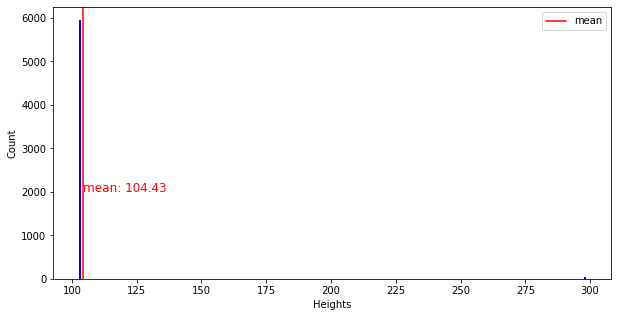

In [4]:
hist = {}
for image in data:
    height = image.shape[0]
    hist[height] = hist.get(height, 0) + 1

print(hist)

sum_height = 0
sum_num = 0

for height, num in hist.items():  # Use .items() to iterate over dictionary key-value pairs
    sum_height += height * num
    sum_num += num

mean = sum_height / sum_num

# Create a bar chart for the histogram
plt.figure(figsize=(10, 5))
plt.bar(list(hist.keys()), list(hist.values()), color="b")
plt.xlabel("Heights")
plt.ylabel("Count")

# Plot the mean value as a horizontal line
plt.axvline(x=mean, color='r', label='mean')
plt.text(mean, 2000, f'mean: {mean:.2f}', fontsize=12, color='r')

plt.legend()  # Add a legend to the plot

plt.show()

{96: 5956, 241: 44}


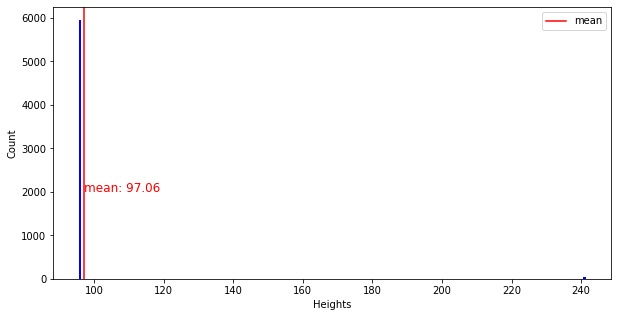

In [5]:
hist = {}
for image in data:
    width = image.shape[1]
    hist[width] = hist.get(width, 0) + 1

print(hist)

sum_width = 0
sum_num = 0

for width, num in hist.items():  # Use .items() to iterate over dictionary key-value pairs
    sum_width += width * num
    sum_num += num

mean = sum_width / sum_num

# Create a bar chart for the histogram
plt.figure(figsize=(10, 5))
plt.bar(list(hist.keys()), list(hist.values()), color="b")
plt.xlabel("Heights")
plt.ylabel("Count")

# Plot the mean value as a horizontal line
plt.axvline(x=mean, color='r', label='mean')
plt.text(mean, 2000, f'mean: {mean:.2f}', fontsize=12, color='r')

plt.legend()  # Add a legend to the plot

plt.show()

Most of the images have fixed size (96, 103) -> Therefore we resize all images to 96 x 103

In [6]:
# resizing all the data to 103X96
for i,image in enumerate(data):
    data[i] = cv2.resize(image ,(96,103))

for i,image in enumerate(easy_images):
    easy_images[i] = cv2.resize(image ,(96,103))
for i,image in enumerate(medium_images):
    medium_images[i] = cv2.resize(image ,(96,103))
for i,image in enumerate(hard_images):
    hard_images[i] = cv2.resize(image ,(96,103)) 

Histogram equalization

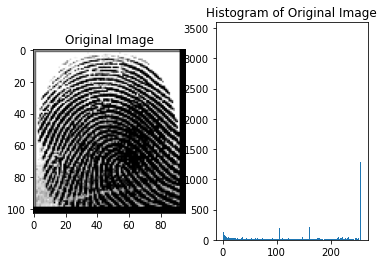

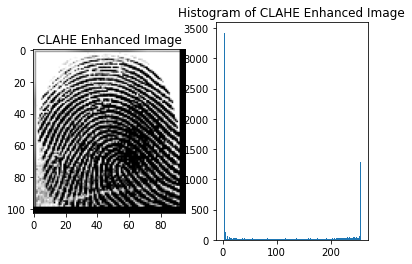

In [7]:
plt.figure()

# Assuming data is your set of images
real_img = real_img_set[77]  # Change index according to your dataset

# Plot original image and its histogram
plt.subplot(121)
plt.imshow(real_img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.hist(real_img.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')

plt.show()

# Apply CLAHE to all images in the 'data' set
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
for i in range(len(data)):
    new = clahe.apply(data[i])
    data[i] = new

# Display the results after CLAHE
plt.figure()

# Plot CLAHE-enhanced image and its histogram for the same index
plt.subplot(121)
plt.imshow(data[77], cmap='gray')
plt.title('CLAHE Enhanced Image')

plt.subplot(122)
plt.hist(data[77].ravel(), 256, [0, 256])
plt.title('Histogram of CLAHE Enhanced Image')

plt.show()

Apply CLAHE for altered data

In [9]:
for i in range(len(easy_images)):
    new = clahe.apply(easy_images[i])
    easy_images[i] = new

for i in range(len(medium_images)):
    new = clahe.apply(medium_images[i])
    medium_images[i] = new

for i in range(len(hard_images)):
    new = clahe.apply(hard_images[i])
    hard_images[i] = new

Apply Median filtering to filter salt&pepper noises

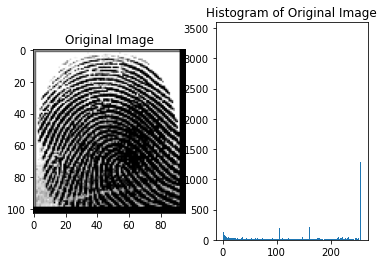

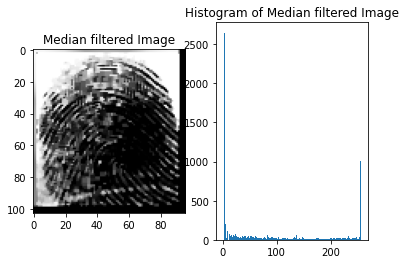

In [ ]:
# Assuming real_img_set is your original set of images
real_img = real_img_set[77]

plt.figure()

# Plot original image and its histogram
plt.subplot(121)
plt.imshow(real_img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.hist(real_img.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')

plt.show()

# Apply median filtering with a small kernel size (e.g., 3x3)
filtered_img = cv2.medianBlur(data[77], 3)

plt.figure()

plt.subplot(121)
plt.imshow(filtered_img, cmap='gray')
plt.title('Median filtered Image')

plt.subplot(122)
plt.hist(filtered_img.ravel(), 256, [0, 256])
plt.title('Histogram of Median filtered Image')

plt.show()


Images got too blurry after being filtered -> Don't filter images, a few noises can be accepted

Apply binarization

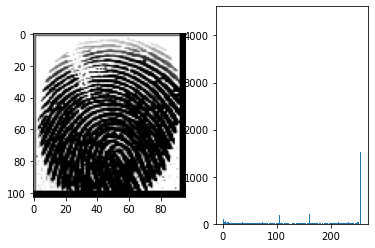

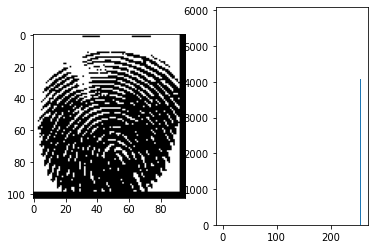

In [ ]:
plt.figure()
plt.subplot(121)
plt.imshow(real_img_set[377], cmap='gray')
plt.subplot(122)
plt.hist(real_img_set[377].ravel(), 256, [0, 256])
plt.show()

otsu_multiplier = 0.5  # Modify this value as needed

# Apply Otsu's thresholding to all images in the 'data' set
for i in range(len(data)):
    _, binary_image = cv2.threshold(data[i], , 255, cv2.THRESH_BINARY)
    data[i] = binary_image

plt.figure()
plt.subplot(121)
plt.imshow(data[377], cmap='gray')
plt.subplot(122)
plt.hist(data[377].ravel(), 256, [0, 256])
plt.show()


Apply binarization for altered data

In [ ]:
for i in range(len(easy_images)):
    _, binary_image = cv2.threshold(easy_images[i], 0, 255, cv2.THRESH_BINARY)
    easy_images[i] = binary_image

for i in range(len(medium_images)):
    _, binary_image = cv2.threshold(medium_images[i], 0, 255, cv2.THRESH_BINARY)
    medium_images[i] = binary_image

for i in range(len(hard_images)):
    _, binary_image = cv2.threshold(hard_images[i], 0, 255, cv2.THRESH_BINARY)
    hard_images[i] = binary_image

However, binarization caused SIFT unable to indentify match points -> So we don't binarize fingerprint images

# ORB

This is for recognition first. 

In [ ]:
# Create an ORB detector
orb = cv2.ORB_create()

data_features = []

# Assuming 'data' contains your original fingerprint images
for img in data:
    keypoints, des = orb.detectAndCompute(img, None)
    data_features.append((keypoints, des))

# Number of random samples to select
num_samples = 30

# Define the directory containing altered fingerprint images (Altered-Easy)
altered_images_dir = "E:\\BioMetric\\Project\\Altered\\Altered-Easy"

# Get a list of sample files from the Altered-Easy directory
sample_files = os.listdir(altered_images_dir)

# Initialize variables to store the best matching result
best_score = 0
best_filename = None
best_image = None

accurate_count = 0
match_points_array = []

# Initialize variables to store counts
imposter_attempts = 0
genuine_attempts = 0
imposter_accepted = 0
genuine_rejected = 0

# Define a range of threshold values to sweep
threshold_range = np.arange(70, 100, 1)  # Adjust the range as needed

eer = 1.0  # Initialize EER to a high value

# Lists to store FAR and FRR values for each threshold
far_values = []
frr_values = []

# Create a FLANN-based matcher for keypoint matching
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Initialize variables and lists

# Loop through each threshold
for threshold in threshold_range:
    # Reset counts for each threshold
    imposter_attempts = 0
    genuine_attempts = 0
    imposter_accepted = 0
    genuine_rejected = 0

    # Randomly select 'num_samples' samples from the list
    selected_samples = random.sample(sample_files, num_samples)

    # Loop through each selected sample image
    for sample_file in selected_samples:
        # Load the sample image
        sample_path = os.path.join(altered_images_dir, sample_file)
        sample = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

        if sample is None:
            print("Error loading:", sample_path)
            continue

        # Initialize variables to store the best matching result for the current sample
        current_best_score = 0
        current_best_filename = None

        # Detect keypoints and compute descriptors for the sample
        keypoints_1, des1 = orb.detectAndCompute(sample, None)

        if des1 is None:
            print("No descriptors found for sample:", sample_file)
            continue

        # Loop through each real fingerprint image in the directory
        for i, (_, des2) in enumerate(data_features):
            matches = matcher.knnMatch(des1, des2, k=2)

            # Filter good matches based on Lowe's ratio test
            match_points = [m for m, n in matches if m.distance < 0.75 * n.distance]

            # Calculate a matching score as the ratio of good matches to total keypoints
            keypoints = min(len(keypoints_1), len(data_features[i][0]))
            score = len(match_points) / keypoints * 100

            if score > current_best_score:
                current_best_score = score
                current_best_filename = photos_names[i]

        # Update the best matching result for the current sample
        if current_best_score > best_score:
            best_score = current_best_score
            best_filename = current_best_filename
            best_image = data[i]

        match_points_array.append(current_best_score)     

        # Update counts based on the matching result for the current sample
        if sample_file.split("__")[0] == best_filename.split("__")[0]: 
            genuine_attempts += 1
            if current_best_score < threshold:
                genuine_rejected += 1
        else:
            imposter_attempts += 1
            if current_best_score >= threshold:
                imposter_accepted += 1

    # Calculate FAR and FRR for the current threshold
    far = imposter_accepted / imposter_attempts if imposter_attempts > 0 else 0
    frr = genuine_rejected / genuine_attempts if genuine_attempts > 0 else 0

    far_values.append(far)
    frr_values.append(frr)

    # Check if EER is achieved
    if abs(far - frr) < eer:
        eer = abs(far - frr)
        eer_threshold = threshold

print("Average match score:", np.mean(match_points_array))

# Print the EER and its corresponding threshold
print("Equal Error Rate (EER):", eer)
print("EER Threshold:", eer_threshold)

# Plot FAR and FRR curves
plt.figure()
plt.plot(threshold_range, far_values, label="FAR")
plt.plot(threshold_range, frr_values, label="FRR")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

# SIFT

Extract keypoints and descriptors for all processed real images in database

In [10]:
# Create a SIFT detector
sift = cv2.SIFT_create()

data_features = []

for i in range (0, len(data)):
    keypoints, des = sift.detectAndCompute(data[i], None)
    data_features.append((keypoints, des))

print(len(data))
print(len(data_features))

6000
6000


Define a FLANN-based matcher

In [11]:
# Create a FLANN-based matcher for keypoint matching
matcher = cv2.FlannBasedMatcher({"algorithm": 1, "trees": 10}, {})

Demo for easy

In [12]:
# Number of random samples to select
num_samples = 3

# Randomly select 'num_samples' samples from the list
easy_selected_samples = random.sample(list(enumerate(easy_images)), num_samples)

Input file name: 508__F_Right_little_finger_Obl.BMP
Matched file name: 508__F_Right_little_finger.BMP
Best score: 50.0


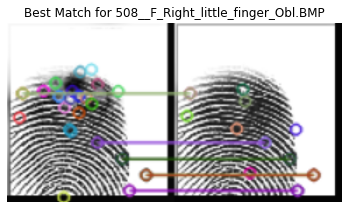

Input file name: 452__F_Right_index_finger_Zcut.BMP
Matched file name: 452__F_Right_index_finger.BMP
Best score: 70.1923076923077


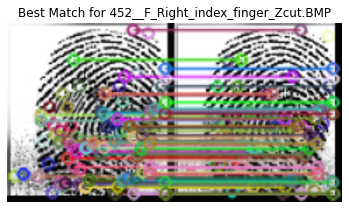

Input file name: 224__M_Right_middle_finger_Obl.BMP
Matched file name: 224__M_Right_middle_finger.BMP
Best score: 64.51612903225806


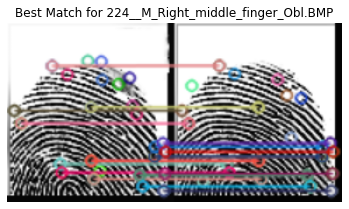

In [13]:
# Loop through each selected sample image
for idx, sample in easy_selected_samples:
    if sample is None:
        print("Error loading:", sample_path)
        continue

    # Initialize variables for the best matching result for the current sample
    current_best_score = 0
    current_best_index = -1
    current_best_kp1 = None
    current_best_kp2 = None
    current_best_mp = None

    keypoints_1, des1 = sift.detectAndCompute(sample, None)

    if des1 is None:
        print("No descriptors found for sample:", sample_file)
        continue

    # Perform matching with the descriptors in the data_features list
    for i, (_, des2) in enumerate(data_features):
        matches = matcher.knnMatch(des1, des2, k=2)
        match_points = [p for p, q in matches if p.distance < 0.3 * q.distance]

        keypoints = min(len(keypoints_1), len(data_features[i][0]))
        score = len(match_points) / keypoints * 100

        if score > current_best_score:
            current_best_score = score
            current_best_index = i
            current_best_kp1 = keypoints_1
            current_best_kp2 = data_features[i][0]
            current_best_mp = match_points

    # Plot matching graph only if a match is found
    if current_best_mp:
        matched_filename = photos_names[current_best_index]

        print("Input file name:", easy_photo_names[idx])
        print("Matched file name:", matched_filename)
        print("Best score:", current_best_score)

        result_image = cv2.drawMatches(
            sample, current_best_kp1, data[current_best_index], current_best_kp2, current_best_mp, None
        )
        result_image = cv2.resize(result_image, None, fx=1.5, fy=1.5)
        plt.imshow(result_image)
        plt.title(f"Best Match for {easy_photo_names[idx]}")
        plt.axis("off")
        plt.show()
    else:
        print("Problem finding current match points")


Demo for medium

In [14]:
# Number of random samples to select
num_samples = 3

# Randomly select 'num_samples' samples from the list
medium_selected_samples = random.sample(list(enumerate(medium_images)), num_samples)

Input file name: 599__M_Right_thumb_finger_CR.BMP
Matched file name: 599__M_Right_thumb_finger.BMP
Best score: 58.82352941176471


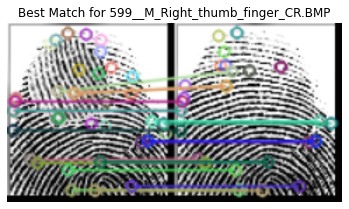

Input file name: 392__M_Left_thumb_finger_CR.BMP
Matched file name: 392__M_Left_thumb_finger.BMP
Best score: 43.90243902439025


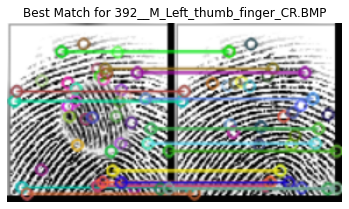

Input file name: 449__F_Right_thumb_finger_Zcut.BMP
Matched file name: 449__F_Right_thumb_finger.BMP
Best score: 35.483870967741936


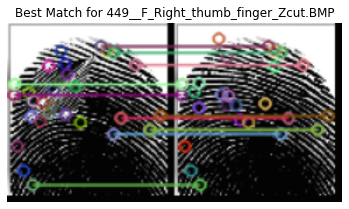

In [15]:
# Loop through each selected sample image
for idx, sample in (medium_selected_samples):
    if sample is None:
        print("Error loading")
        continue

    # Initialize variables for the best matching result for the current sample
    current_best_score = 0
    current_best_index = -1
    current_best_kp1 = None
    current_best_kp2 = None
    current_best_mp = None

    keypoints_1, des1 = sift.detectAndCompute(sample, None)

    if des1 is None:
        print("No descriptors found for sample:", sample_file)
        continue

    # Perform matching with the descriptors in the data_features list
    for i, (_, des2) in enumerate(data_features):
        matches = matcher.knnMatch(des1, des2, k=2)
        match_points = [p for p, q in matches if p.distance < 0.3 * q.distance]

        keypoints = min(len(keypoints_1), len(data_features[i][0]))
        score = len(match_points) / keypoints * 100

        if score > current_best_score:
            current_best_score = score
            current_best_index = i
            current_best_kp1 = keypoints_1
            current_best_kp2 = data_features[i][0]
            current_best_mp = match_points

    # Plot matching graph only if a match is found
    if current_best_mp:
        matched_filename = photos_names[current_best_index]

        print("Input file name:", medium_photo_names[idx])
        print("Matched file name:", matched_filename)
        print("Best score:", current_best_score)

        result_image = cv2.drawMatches(
            sample, current_best_kp1, data[current_best_index], current_best_kp2, current_best_mp, None
        )
        result_image = cv2.resize(result_image, None, fx=1.5, fy=1.5)
        plt.imshow(result_image)
        plt.title(f"Best Match for {medium_photo_names[idx]}")
        plt.axis("off")
        plt.show()
    else:
        print("Problem finding current match points")


Demo for hard

In [19]:
# Number of random samples to select
num_samples = 3

# Randomly select 'num_samples' samples from the list
hard_selected_samples = random.sample(list(enumerate(hard_images)), num_samples)

Input file name: 404__M_Left_ring_finger_Obl.BMP
Matched file name: 404__M_Left_ring_finger.BMP
Best score: 7.936507936507936


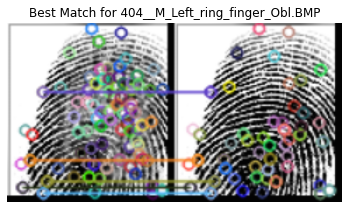

Input file name: 62__M_Right_index_finger_Obl.BMP
Matched file name: 62__M_Right_index_finger.BMP
Best score: 24.0


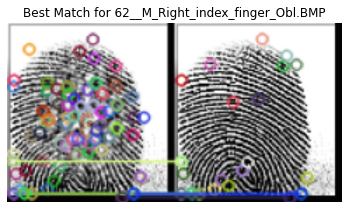

Input file name: 561__M_Left_index_finger_CR.BMP
Matched file name: 561__M_Left_index_finger.BMP
Best score: 31.147540983606557


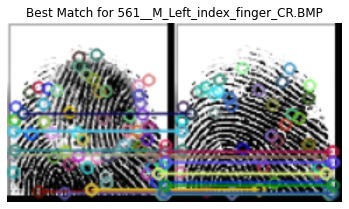

In [20]:
# Loop through each selected sample image
for idx, sample in hard_selected_samples:
    if sample is None:
        print("Error loading")
        continue

    # Initialize variables for the best matching result for the current sample
    current_best_score = 0
    current_best_index = -1
    current_best_kp1 = None
    current_best_kp2 = None
    current_best_mp = None

    keypoints_1, des1 = sift.detectAndCompute(sample, None)

    if des1 is None:
        print("No descriptors found for sample:", sample_file)
        continue

    # Perform matching with the descriptors in the data_features list
    for i, (_, des2) in enumerate(data_features):
        matches = matcher.knnMatch(des1, des2, k=2)
        match_points = [p for p, q in matches if p.distance < 0.1 * q.distance]

        keypoints = min(len(keypoints_1), len(data_features[i][0]))
        score = len(match_points) / keypoints * 100

        if score > current_best_score:
            current_best_score = score
            current_best_index = i
            current_best_kp1 = keypoints_1
            current_best_kp2 = data_features[i][0]
            current_best_mp = match_points

    # Plot matching graph only if a match is found
    if current_best_mp:
        matched_filename = photos_names[current_best_index]

        print("Input file name:", hard_photo_names[idx])
        print("Matched file name:", matched_filename)
        print("Best score:", current_best_score)

        result_image = cv2.drawMatches(
            sample, current_best_kp1, data[current_best_index], current_best_kp2, current_best_mp, None
        )
        result_image = cv2.resize(result_image, None, fx=1.5, fy=1.5)
        plt.imshow(result_image)
        plt.title(f"Best Match for {hard_photo_names[idx]}")
        plt.axis("off")
        plt.show()
    else:
        print("Problem finding current match points")

This is the old version (still needed for reviewing code)

In [ ]:
# Initialize variables to store the best matching result
best_score = 0
best_filename = None
best_image = None
best_kp1 = None
best_kp2 = None
best_mp = None

accurate_count = 0
match_points_array = []


# Loop through each selected sample image
for sample_file in selected_samples:
    # Load the sample image
    sample_path = os.path.join(hard_images_dir, sample_file)
    sample = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

    if sample is None:
        print("Error loading:", sample_path)
        continue

    # Initialize variables to store the best matching result for the current sample
    current_best_score = 0
    current_best_filename = None

    for i in range (0, len(data_features)):
        # Detect keypoints and compute descriptors for the sample and real fingerprint images
        keypoints_1, des1 = sift.detectAndCompute(sample, None)
        keypoints_2, des2 = data_features[i]

        matches = matcher.knnMatch(des1, des2, k=2)

        # Filter good matches based on Lowe's ratio test
        match_points = [p for p, q in matches if p.distance < 0.1 * q.distance]

        # Calculate a matching score as the ratio of good matches to total keypoints
        keypoints = min(len(keypoints_1), len(keypoints_2))
        score = len(match_points) / keypoints * 100

        if score > current_best_score:
            current_best_score = score
            current_best_filename = photos_names[i]

    # Update the best matching result for the current sample
    if current_best_score > best_score:
        best_score = current_best_score
        best_filename = current_best_filename
        best_image = data[i]
        best_kp1, best_kp2, best_mp = keypoints_1, keypoints_2, match_points

    # Print the best match filename and score for the current sample
    print("Input file name:", sample_file)
    print("Best match:", current_best_filename)
    print("Best score:", current_best_score)
    if sample_file.split("__")[0] == current_best_filename.split("__")[0]:
        accurate_count += 1    
        match_points_array.append(current_best_score)   

print("Average match score:", np.mean(match_points_array))

# Display the overall best match result if it exists
if best_mp:
    result = cv2.drawMatches(sample, best_kp1, best_image, best_kp2, best_mp, None)
    result = cv2.resize(result, None, fx=5, fy=5)
    image = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Best Match")
    plt.axis("off")
    plt.show()


# Person ID accuracy for recognition (altered-easy) -> 100% luon
print("Accuracy: " + str(accurate_count/num_samples * 100) + "%")

Average match score: 41.3543619765523


In [ ]:
# Person ID accuracy for recognition (altered-easy) -> 100% luon
print("Accuracy: " + str(accurate_count/num_samples * 100) + "%")

# Adaptive threshold for fingerprint AUTHENTICATION (legit if match_score > threshold)
# TODO

1.0
